# Import data


In [30]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
!pwd

/Users/katharina/projects/HCKT01


# Read data


In [50]:
df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [4]:
df.head()

,ID,DATE_DEPARTURE_UTC,DATE_ARRIVAL_UTC,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN,ORIGIN_AIRPORT_ID,DEST,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,DEP_DEL15,ARR_DEL15
0,345355,2020-01-18 22:10:00,2020-01-18 23:59:00,2020-01-18 15:10:00,2020-01-18 15:59:00,SLC,14869,SNA,14908,N128DU,DL,19790,1056,588.0,0,0.0,0
1,323447,2020-01-17 21:47:00,2020-01-18 04:10:00,2020-01-17 16:47:00,2020-01-17 20:10:00,BOS,10721,SEA,14747,N486AS,AS,19930,15,2496.0,0,NaN,0
2,242237,2020-01-13 13:26:00,2020-01-13 14:26:00,2020-01-13 07:26:00,2020-01-13 08:26:00,DAL,11259,HOU,12191,N901WN,WN,19393,3,239.0,0,NaN,0
3,271408,2020-01-15 02:45:00,2020-01-15 03:37:00,2020-01-14 20:45:00,2020-01-14 21:37:00,STL,15016,DSM,11423,N778SW,WN,19393,1588,259.0,0,0.0,0
4,282447,2020-01-15 23:22:00,2020-01-16 00:49:00,2020-01-15 18:22:00,2020-01-15 19:49:00,CLT,11057,CHS,10994,N579NN,OH,20397,5207,168.0,0,NaN,1


* DATE_DEPARTURE_UTC - UTC timestamp of the flight departure.
* DATE_ARRIVAL_UTC - UTC timestamp of the flight arrival.
* DATE_DEPARTURE_LCL - Local timestamp of the flight departure.
* DATE_ARRIVAL _LCL - Local timestamp of the flight arrival.
* ORIGIN - The name associated with each unique airport from which an airplane departs.
* ORIGIN_AIRPORT_ID - ID associated with each unique airport from which an airplane departs.
* DEST - The name associated with each unique airport to which an airplane arrives.
* DEST_AIRPORT_ID - ID associated with each unique airport to which an airplane arrives.
* TAIL_NUM - The number of the airplane, we can see this as the airplane “licence plate number”.
* OP_CARRIER - The name of the airline company associated with each unique flight.
* OP_CARRIER_AIRLINE_ID - ID associated with each unique airline company.
* OP_CARRIER_FL_NUM - The number of the flight given by the airline company. 
* DISTANCE - The distance between the origin and destination airports
* CANCELLED - Whether or not the flight was cancelled.
* DEP_DEL15 - Discriminates whether an airplane departed with delay or not. A plane is considered delayed if it departs more than 15 minutes after the scheduled time.
* ARR_DEL15 - Target Variable Discriminates whether an airplane arrives with delay or not. A plane is considered delayed if it arrives more than 15 minutes after the scheduled time.


In [7]:
# size
df.shape

(419487, 17)

In [49]:
df.dtypes

ID                         int64
DATE_DEPARTURE_UTC        object
DATE_ARRIVAL_UTC          object
DATE_DEPARTURE_LCL        object
DATE_ARRIVAL_LCL          object
ORIGIN                    object
ORIGIN_AIRPORT_ID          int64
DEST                      object
DEST_AIRPORT_ID            int64
TAIL_NUM                  object
OP_CARRIER                object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER_FL_NUM          int64
DISTANCE                 float64
CANCELLED                  int64
DEP_DEL15                float64
ARR_DEL15                  int64
dtype: object

In [5]:
df.describe()

,ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,DEP_DEL15,ARR_DEL15
count,419487.000000,419487.000000,419487.000000,419487.000000,419487.000000,401869.000000,419487.0,272667.000000,419487.000000
mean,212639.517973,12656.739730,12655.545597,19993.369749,2628.837404,803.586898,0.0,0.147227,0.148264
std,123449.043509,1525.037067,1524.512434,375.543815,1825.643818,589.887296,0.0,0.354333,0.355362
min,0.000000,10135.000000,10135.000000,19393.000000,1.000000,31.000000,0.0,0.000000,0.000000
25%,105540.500000,11292.000000,11292.000000,19790.000000,1073.000000,370.000000,0.0,0.000000,0.000000
50%,212787.000000,12889.000000,12889.000000,19977.000000,2184.000000,645.000000,0.0,0.000000,0.000000
75%,319018.500000,14027.000000,14027.000000,20378.000000,4115.000000,1045.000000,0.0,0.000000,0.000000
max,435681.000000,16869.000000,16869.000000,20452.000000,6799.000000,5095.000000,0.0,1.000000,1.000000


In [33]:
numerical = ["ORIGIN_AIRPORT_ID", 
             "DEST_AIRPORT_ID", 
             "OP_CARRIER_AIRLINE_ID", 
             "OP_CARRIER_FL_NUM", 
             "DISTANCE", 
             "CANCELLED", 
             "DEP_DEL15", 
             "ARR_DEL15" ]
categorical = []

In [8]:
df.isnull().sum()

ID                            0
DATE_DEPARTURE_UTC            0
DATE_ARRIVAL_UTC              0
DATE_DEPARTURE_LCL            0
DATE_ARRIVAL_LCL              0
ORIGIN                        0
ORIGIN_AIRPORT_ID             0
DEST                          0
DEST_AIRPORT_ID               0
TAIL_NUM                      0
OP_CARRIER                    0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER_FL_NUM             0
DISTANCE                  17618
CANCELLED                     0
DEP_DEL15                146820
ARR_DEL15                     0
dtype: int64

"DISTANCE"(distance between the airports) and "DEP_DEL15"(departure delay) have missing values

In [10]:
df.isnull().sum()/df.shape[0]

ID                       0.000000
DATE_DEPARTURE_UTC       0.000000
DATE_ARRIVAL_UTC         0.000000
DATE_DEPARTURE_LCL       0.000000
DATE_ARRIVAL_LCL         0.000000
ORIGIN                   0.000000
ORIGIN_AIRPORT_ID        0.000000
DEST                     0.000000
DEST_AIRPORT_ID          0.000000
TAIL_NUM                 0.000000
OP_CARRIER               0.000000
OP_CARRIER_AIRLINE_ID    0.000000
OP_CARRIER_FL_NUM        0.000000
DISTANCE                 0.041999
CANCELLED                0.000000
DEP_DEL15                0.349999
ARR_DEL15                0.000000
dtype: float64

## Look at the target variable

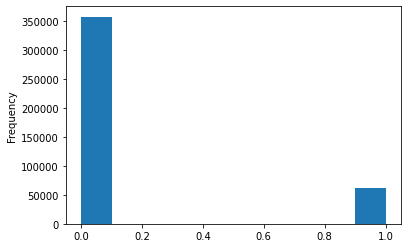

In [13]:
df["ARR_DEL15"].plot.hist()

In [15]:
df["ARR_DEL15"].value_counts(normalize=True)

0    0.851736
1    0.148264
Name: ARR_DEL15, dtype: float64

In [20]:
df["ARR_DEL15"].value_counts()

0    357292
1     62195
Name: ARR_DEL15, dtype: int64

In [23]:
df[~df.DEP_DEL15.isnull()].ARR_DEL15.value_counts()

0    232240
1     40427
Name: ARR_DEL15, dtype: int64

In [21]:
df[~df.DEP_DEL15.isnull()].ARR_DEL15.value_counts(normalize = True)

0    0.851735
1    0.148265
Name: ARR_DEL15, dtype: float64

## Cancelled flights

In [42]:
df["CANCELLED"].value_counts()

0    419487
Name: CANCELLED, dtype: int64

okaaay.. so get rid of it


## Some plots


### The number of the flight given by the airline company.

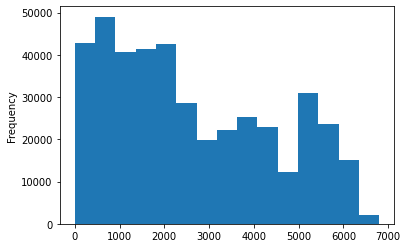

In [39]:
df["OP_CARRIER_FL_NUM"].plot.hist(bins = 15)

### Distance

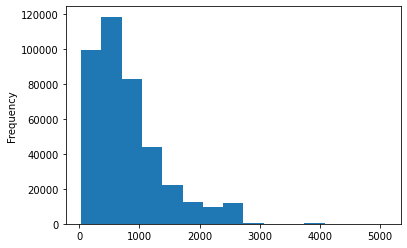

In [40]:
df["DISTANCE"].plot.hist(bins = 15)

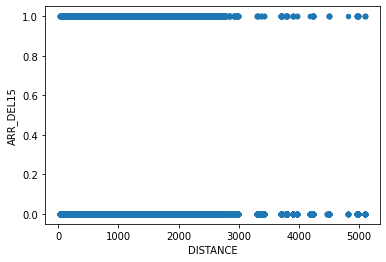

In [45]:
df.plot.scatter(x = "DISTANCE", y = "ARR_DEL15")

### Distance vs. ARR_DEL15

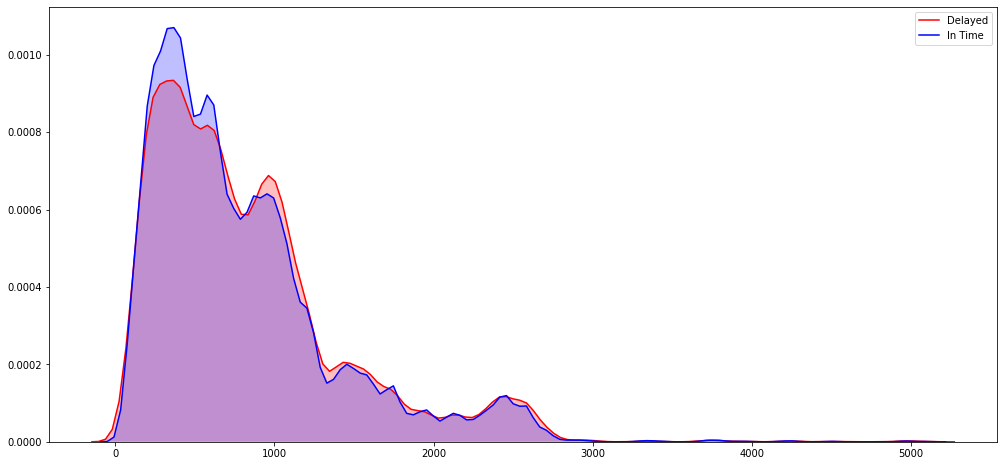

In [46]:
plt.figure(figsize = (17,8))
# A
# YOUR CODE HERE
sns.kdeplot(df["DISTANCE"][df.ARR_DEL15 == 1], color = 'r', shade = True)
sns.kdeplot(df["DISTANCE"][df.ARR_DEL15 == 0], color = 'b', shade = True)

plt.legend(['Delayed', 'In Time'])
plt.show()

### Number of operated flights vs. ARR_DEL15

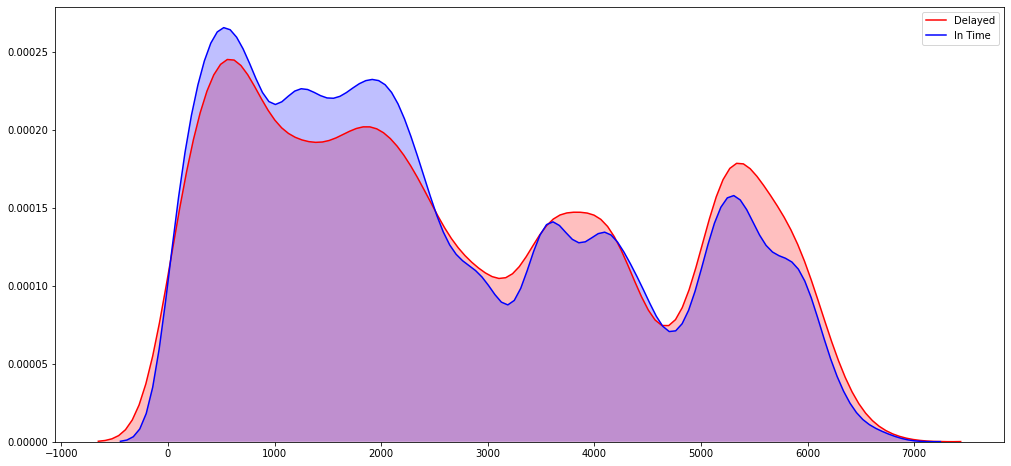

In [47]:
plt.figure(figsize = (17,8))
# A
# YOUR CODE HERE
sns.kdeplot(df["OP_CARRIER_FL_NUM"][df.ARR_DEL15 == 1], color = 'r', shade = True)
sns.kdeplot(df["OP_CARRIER_FL_NUM"][df.ARR_DEL15 == 0], color = 'b', shade = True)

plt.legend(['Delayed', 'In Time'])
plt.show()

## Corr Matrix


,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,DEP_DEL15,ARR_DEL15
0,14869,14908,19790,1056,588.0,0,0.0,0
1,10721,14747,19930,15,2496.0,0,NaN,0
2,11259,12191,19393,3,239.0,0,NaN,0
3,15016,11423,19393,1588,259.0,0,0.0,0
4,11057,10994,20397,5207,168.0,0,NaN,1
...,...,...,...,...,...,...,...,...
419482,13891,13796,19393,1475,362.0,0,0.0,0
419483,11697,12478,20409,1202,1069.0,0,0.0,0
419484,12266,12889,19977,1044,1222.0,0,0.0,0
419485,13342,13204,19393,3487,1066.0,0,NaN,0


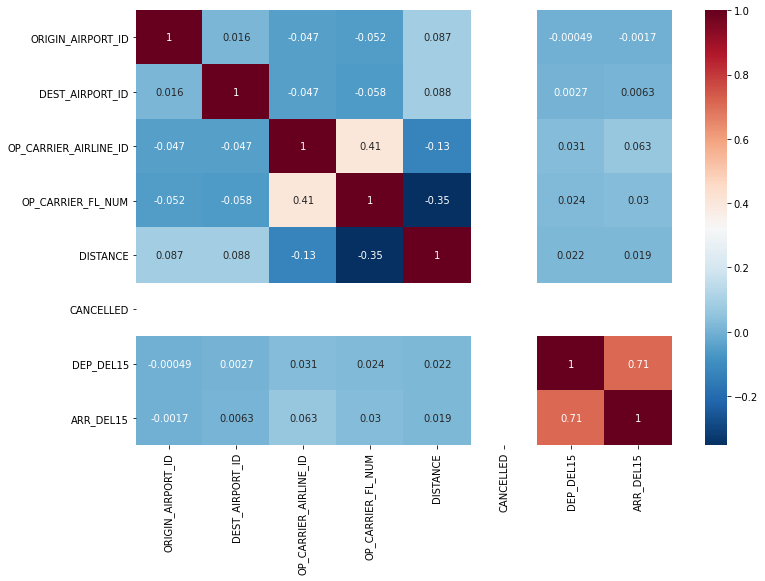

In [36]:
display(df[numerical])
plt.figure(figsize = (12,8)) # <-- just sets the figure size 
sns.heatmap(df[numerical].corr(method='pearson'), 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); # <-- use a "red into blue, reversed" colormap 



## DUPLICATES!!
